# Theoretical construction of the model

The model only contains two components
 - a disk characterised by
     - projected rotational velocity $v_r = v_\mathrm{rot} \sin \theta$
     - an asymmetric factor (explained later) $k$
     - gas cloud velocity dispersion $v_\sigma$
 - a gaussian peak component charaterised by
     - disk flux fraction $r$
     - Gaussian peak STD $v_g$
     
And besides the 5 parameters above, another two parameter denoting total H I flux $F$ and line centre velocity $v_c$ is required.

## Line emission from a co-rotating disk

First consider a pure rotationally dominated disk at a single rotational speed $v_\mathrm{rot}$, the emission in each observed velocity bin $\mathrm{d}v_{\mathrm{l.o.s}}$ is given by
\begin{equation}\begin{split}
	\frac{\mathrm{d}F}{\mathrm{d}v_\mathrm{l.o.s}} = \frac{\mathrm{d}F}{\mathrm{d}m} \frac{\mathrm{d}m}{\mathrm{d}\phi}\left|\frac{\mathrm{d}\phi}{\mathrm{d}v_\mathrm{l.o.s}}\right|
\end{split}\end{equation}

in which $\phi$ is the angle in disk frame, defined as angle of disk element from tranverse to l.o.s. In the R.h.S, the first two components are constant intrinsic to HI emission and assumed uniform angular mass distribution due to symmetry. Hence the only useful thing is the last term. Since $v_r = v_\mathrm{rot}\sin(\theta)$ is defined as the projected rotational velocity, and $v_\mathrm{l.o.s} = v_\mathrm{rot}\sin(\theta) \cos(\phi)$, the line shape of this  model is 
\begin{equation}\begin{split}
	\frac{\mathrm{d}F}{\mathrm{d}v_\mathrm{l.o.s}} \propto \left|\frac{\mathrm{d}}{\mathrm{d}v_{\mathrm{l.o.s}}} \arccos \left( \frac{v_\mathrm{l.o.s}}{v_r} \right) \right|=\frac{1}{\sqrt{v_r^2-v_\mathrm{l.o.s}^2}}
\end{split}\end{equation}
The integral of the expression is $\pi$.

An example spectrum with $v_{rot}=200\ \mathrm{km/s}$ and $\theta=30$ is shown below, note that the two edges are singularities.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

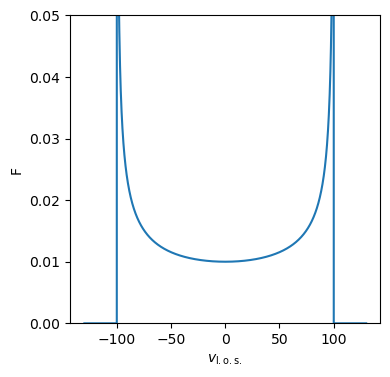

In [17]:
# co-rotating disk model
v_r = 200*np.sin(30/180*np.pi)
v_los = np.linspace(-v_r-30, v_r+30, 2000)
line = 1/np.sqrt((v_r)**2-v_los**2)
line[~np.isfinite(line)] = 0

fig = plt.figure(figsize=(4, 4), dpi=100)
plt.plot(v_los, line)
plt.ylim(0, .05)
plt.xlabel(r"$v_\mathrm{l.o.s.}$"); plt.ylabel("F")
plt.show()

## Line emission from an asymmetric disk

Now consider an asymmetric case. The extent of asymmetry is decribed by $k \in (-2/\pi, 2/\pi)$, normalised mass slope,
\begin{equation}\begin{split}
	k \propto \frac{ \mathrm{d}(\mathrm{d} m/\mathrm{d}\phi)}{\mathrm{d}\phi}\frac{2\pi}{M}
\end{split}\end{equation}

in which $\phi \in [0,\pi]$. In order to normalise to $1$
\begin{equation}\begin{split}
	\frac{2\pi}{M}\frac{ \mathrm{d}m}{\mathrm{d}\phi}\bigg|_\phi \propto 1+ k(\phi - \pi/2)
\end{split}\end{equation}

In this definition, a positive $k$ corresponds to a larger peak in the approaching (blue, lower v) side.

and line intensity becomes
\begin{equation}\begin{split}
	\frac{\mathrm{d}F}{\mathrm{d}v_\mathrm{l.o.s}} \propto \frac{1}{\sqrt{v_r^2-v_\mathrm{l.o.s}^2}}  \left\{ 1 + k \left[ \arccos \left( \frac{v_\mathrm{l.o.s}}{v_r} \right) - \frac{\pi}{2} \right] \right\}
\end{split}\end{equation}

The integral of the expression is still $\pi$.

Shown below is an example of $k=1/\pi$, and the same parameter as the previous plot. In this case the mass ratio is $5/3$, and line ratio $3/1$.

Text(0, 0.5, '$\\mathrm{d}M\\ /\\ \\mathrm{d}\\phi$')

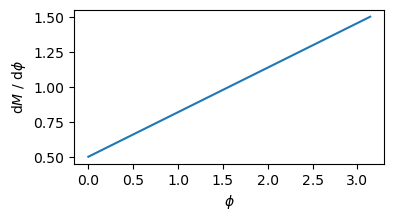

In [18]:
# angular density 
fig = plt.figure(figsize=(4, 2), dpi=100)
k = 1/np.pi
phiphi = np.linspace(0, np.pi, 30)
plt.plot(phiphi, 1 + k * (phiphi - np.pi/2))
plt.xlabel(r"$\phi$"); plt.ylabel(r"$\mathrm{d}M\ /\ \mathrm{d}\phi$")

The spectrum now is plotted below

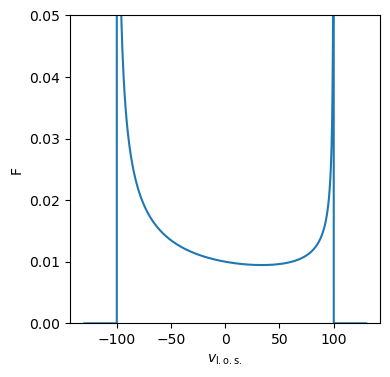

In [16]:
# asymmetric co-rotating disk
v_r, k = 200*np.sin(30/180*np.pi), 1/np.pi
v_los = np.linspace(-v_r-30, v_r+30, 2000)
line = 1/np.sqrt((v_r)**2-v_los**2)*(1+k*(np.arccos(v_los/v_r)-np.pi/2))
line[~np.isfinite(line)] = 0

fig = plt.figure(figsize=(4, 4), dpi=100)
plt.plot(v_los,line)
plt.ylim(0,.05)
plt.xlabel(r"$v_\mathrm{l.o.s.}$"); plt.ylabel("F")
plt.show()

## Line emission from a disk with velocity dispersion

Finally for this disk, we add gas cloud dispersion to it. Then the line intensity becomes
\begin{equation}\begin{split}
	\frac{\mathrm{d}F}{\mathrm{d}v_\mathrm{l.o.s}} &= \frac{\mathrm{d}F}{\mathrm{d}v} \otimes G((v-v_\mathrm{l.o.s}), v_\sigma)\\
    &\propto  \int_{-v_W}^{v_W} -\frac{1}{\sqrt{v_W^2-v^2}}  \left\{ 1 + k \left[ \arccos \left( \frac{v}{v_W} \right) - \frac{\pi}{2} \right] \right\} \exp\left(- \frac{(v-v_\mathrm{l.o.s})^2}{2 v_\sigma^2} \right) \mathrm{d}v\\
    &=\int_0^\pi [1 + k(\phi - \pi/2)]\exp\left(- \frac{(v_W \cos \phi - v_\mathrm{l.o.s})^2}{2 v_\sigma^2}  \right) \mathrm{d}\phi\\
    &=\int_{-\pi/2}^{\pi/2} [1 + k\varphi]\exp\left(- \frac{(-v_W \sin \varphi - v_\mathrm{l.o.s})^2}{2 v_\sigma^2}  \right) \mathrm{d}\varphi
\end{split}\end{equation}

This integration is currently analytically infeasible because of the $\int_0^\pi \phi \exp(-a\cos \phi)\mathrm{d}\phi$ term. The integral flux in the line is $\sqrt{2 \pi} v_\sigma \pi$.

Shown below is an example with $v_\sigma=10 \ \mathrm{km/s}$, such that $v_\mathrm{fwhm}=10 * 2.355 \ \mathrm{km/s}$ and other parameters same as before.

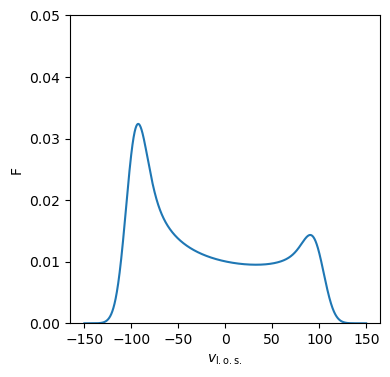

In [39]:
# asymmetric single speed disk with velocity dispersion
v_r, k, v_sigma = 200*np.sin(30/180*np.pi), 1/np.pi, 10
dv, dphi = 0.1, np.pi/300
v_los = np.arange(-v_r-50, v_r+50, dv)

# numerical integration
flag = (-v_r - 5 * v_sigma < v_los) & (v_los < v_r + 5 * v_sigma)
vv_los = v_los[flag].reshape(1, -1)
phiphi = np.arange(-np.pi / 2 + dphi / 2, np.pi / 2, dphi).reshape(-1, 1)
sinphi = np.sin(phiphi)
line_disk = np.zeros(v_los.size)
line_disk[flag] = ((1 + k * phiphi) *
                   np.exp(-(v_r * sinphi + vv_los) ** 2 /
                          (2 * v_sigma ** 2))).sum(axis=0) \
                  * dphi / np.sqrt(2 * np.pi) / np.pi / v_sigma * np.pi

# plot the spectrum
fig = plt.figure(figsize=(4, 4), dpi=100)
plt.plot(v_los, line_disk)
plt.xlabel(r"$v_\mathrm{l.o.s.}$"); plt.ylabel("F")
plt.ylim(0, .05)
plt.show()

## Add a gaussian component

A gaussian shaped peak is added to the profile in order to (1) fill in the trough of disk profile so as to generate profiles of different horn-trough contrast; (2) represent the single gaussian-like spectral line; (3) describe the broad wing beyond the disk profile. The width of the gaussian component is controlled by variable $v_g$, which is the STD $\sigma$ of the gaussian peak.
\begin{equation}\begin{split}
	\frac{\mathrm{d}F}{\mathrm{d}v_\mathrm{l.o.s}} = \frac{1}{\sqrt{2 \pi v_g^2}}\exp\left[ -\frac{v_\mathrm{l.o.s}^2}{2v_g^2} \right]
\end{split}\end{equation}

Below is a sample of $v_g= 150/2.355 \ \mathrm{km/s}$ so that $v_\mathrm{fwhm}=150\ \mathrm{km/s}$.

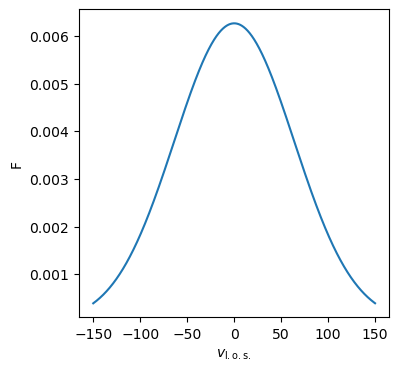

In [43]:
# gaussian component model
v_g = 150/2.355
dv = 0.1
v_los= np.arange(-150, 150, dv)

fig = plt.figure(figsize=(4, 4), dpi=100)
plt.plot(v_los, np.exp(-v_los**2/2/v_g**2)/np.sqrt(2*np.pi*v_g**2))
plt.xlabel(r"$v_\mathrm{l.o.s.}$"); plt.ylabel("F")
plt.show()

# Assemble a galaxy

The gaussian component is connected with the disk part by the disk flux fraction $r$, and governed by line flux $F$.

The generic expression of the model is
\begin{equation}\begin{split}
	\frac{\mathrm{d}F}{\mathrm{d}v} = F \times \bigg\{& \frac{r}{\sqrt{2\pi} v_\sigma \pi} \int_0^\pi [1 + k(\varphi - \pi/2)]\exp\left[- \frac{(v_r \cos \varphi + v_c - v)^2}{2 v_\sigma^2}  \right] \mathrm{d} \varphi + \\
	& \frac{1-r}{\sqrt{2\pi} v_g} \exp \left[-\frac{(v_c - v)^2}{2 v_g^2} \right] \bigg\}
\end{split}\end{equation}

Below is an example combining the disk and gaussian components described above, with $F=2$ Jy km/s and $r=1-0.15=0.85$. We use the built-in function in the PANDISC package to evaluate the spectra.

In [48]:
import pandisc

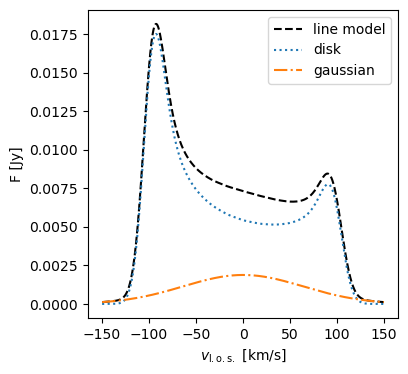

In [47]:
# disk + gaussian
v_r, k, v_sigma = 200*np.sin(30/180*np.pi), 1/np.pi, 10
v_g, r = 150/2.355, 1-0.15
F, v_c = 2, 0

v_los = np.arange(-150, 150, 0.1)
line_disk = pandisc.disk(v_r, k, v_sigma, F * r, v_c, v_los)
line_gauss = pandisc.gaussian(v_g, F * (1 - r), v_c, v_los)

fig = plt.figure(figsize=(4, 4), dpi=100)
plt.plot(v_los, (line_disk + line_gauss), 'k--', label="line model")
plt.plot(v_los, line_disk, ':', label="disk")
plt.plot(v_los, line_gauss, '-.', label="gaussian")
plt.legend()
plt.xlabel(r"$v_\mathrm{l.o.s.}$ [km/s]"); plt.ylabel("F [Jy]")
plt.show()

## Computing widths

And we can get the $W50_\mathrm{model}$ and peak-to-peak width of this spectral by call the function `w50m()` and `disk_peak_width()` respectively like below. As you can see, The values of $W50_\mathrm{model}$, $W_\mathrm{peak}$ and $2 v_r$ are all different.

In [53]:
w50m = pandisc.w50m(v_r, v_sigma, r, v_g)
wp = pandisc.disk_peak_width(v_r, v_sigma)

In [61]:
print("W50m: %.2f\nWp: %.2f\n2 v_r: %.2f" % (w50m, wp, 2 * v_r))

W50m: 211.29
Wp: 185.00
2 v_r: 200.00


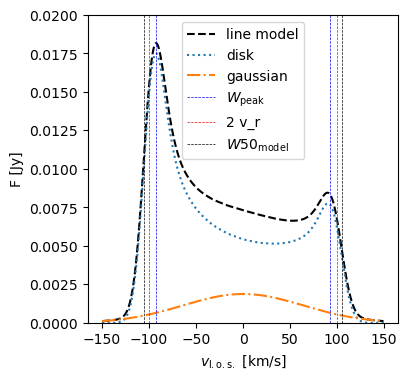

In [57]:
fig = plt.figure(figsize=(4, 4), dpi=100)
plt.plot(v_los, (line_disk + line_gauss), 'k--', label="line model")
plt.plot(v_los, line_disk, ':', label="disk")
plt.plot(v_los, line_gauss, '-.', label="gaussian")

ylim = (0, 0.02)
for width, color, label in zip(
    (wp, 2*v_r, w50m), ("b", "r", "k"), 
    (r"$W_\mathrm{peak}$", r"2 v_r", r"$W50_\mathrm{model}$")):
    plt.plot([-width/2]*2, ylim, color=color, ls="--", lw=0.5, label=label)
    plt.plot([width/2]*2, ylim, color=color, ls="--", lw=0.5)
plt.legend()
plt.ylim(ylim)
plt.xlabel(r"$v_\mathrm{l.o.s.}$ [km/s]"); plt.ylabel("F [Jy]")
plt.show()